## 1.分段线性插值

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def read_data():
    
    data=pd.read_csv('./jisuanfangfa/sea2020.csv',header=None,names=['探测点','深度'])
    x=data['探测点']
    y=data['深度']
    return x,y

x,y=read_data()


In [17]:
def findk(x_,x):
    n=len(x)
    K=1
    for i in range(1,n):
        if x_<=x[i]:
            K=i
            break
        else:
            K=i+1
    return K
        

In [20]:
findk(4850,x)

49

In [40]:
x_cz=np.arange(0,5000,1)


In [22]:
def PLT(x_cz,x,y):
    y_cz=[]
    for i in range(len(x_cz)):
        k=findk(x_cz[i],x)

        y_=y[k]+((y[k]-y[k-1])/(x[k]-x[k-1]))*(x_cz[i]-x[k])
        y_cz.append(y_)
        
    return y_cz
    


In [23]:
y_cz=PLT(x_cz,x,y)

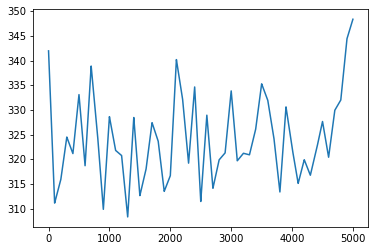

In [24]:
plt.plot(x_cz,y_cz)

## 2.三次样条插值

In [36]:
def findk(x_,x):
    n=len(x)
    K=1
    for i in range(1,n):
        if x_<=x[i]:
            K=i
            break
        else:
            K=i+1
    return K

def SPLINEM(x,y,d0=0,dn=0,namd0=0,miun=0):
    # 初始化
    n=len(x)-1 #  51个点，n=50 
    d=np.zeros(n+1) # d=0--n=51
    b=np.full(shape=n+1,fill_value=2) # b=0--n=51
    c=np.zeros(n) #从0开始，50
    a=np.zeros(n+1) #索引从1开始,索引为0的点不用，51个点
    h=np.zeros(n+1)# 索引从1开始，索引为0的点不用，51个点
    

    # 求差商
    for i in range(1,n):
        d[i]=(((y[i+1]-y[i])/(x[i+1]-x[i]))-((y[i]-y[i-1])/(x[i]-x[i-1])))/(x[i+1]-x[i-1])
  
    h[1]=x[1]-x[0]
    
    for m in np.arange(1,n):
        h[m+1]=x[m+1]-x[m]
        c[m]=h[m+1]/(h[m]+h[m+1])
        a[m]=1-c[m]
        d[m]=6*d[m]
        
    d[0]=d0
    d[n]=dn
    c[0]=namd0
    a[n]=miun
    return a,b,c,d

def TSS(a,b,c,d):
    n=len(d)-1
    # 初始化
    u=np.zeros(n+1)  #从0--n  51个点
    y=np.zeros(n+1)  #从0--n  51个点
    l=np.zeros(n+1)  #从1-n  索引0不用， 51个点
    #r=np.zeros(n)    #从0到n-1  50个点
    x=np.zeros(n+1)
    
    u[0]=b[0]
    y[0]=d[0]
    for i in range(1,n+1):
        l[i]=a[i]/u[i-1]
        u[i]=b[i]-l[i]*c[i-1]
        y[i]=d[i]-l[i]*y[i-1]
    
    x[n]=y[n]/u[n]
    for j in range(n-1,-1,-1):
        x[j]=(y[j]-c[j]*x[j+1])/u[j]

    return x
    
def EVASPLINE(x,y,x_cz):
    n=len(x)-1
    a,b,c,d=SPLINEM(x,y,d0=0,dn=0,namd0=0,miun=0)
    M=TSS(a,b,c,d)
    
    h=np.zeros(n+1)
    y_cz=[]
    
    
    for i in range(len(x_cz)):
        k=findk(x_cz[i],x)
        h=x[k]-x[k-1]
        x_1=x[k]-x_cz[i]
        x_2=x_cz[i]-x[k-1]
        y_=(M[k-1]*(x_1)**3/6+M[k]*(x_2)**3/6+(y[k-1]-M[k-1]*h**2/6)*x_1+(y[k]-M[k]*h**2/6)*x_2)/h
        y_cz.append(y_)
    return y_cz
        

In [33]:

'''
n=50
d=np.zeros(n+1)
for i in range(1,n):
    d[i]=(((y[i+1]-y[i])/(x[i+1]-x[i]))-((y[i]-y[i-1])/(x[i]-x[i-1])))/(x[i+1]-x[i-1])


d_=6*d  
d_'''

'\nn=50\nd=np.zeros(n+1)\nfor i in range(1,n):\n    d[i]=(((y[i+1]-y[i])/(x[i+1]-x[i]))-((y[i]-y[i-1])/(x[i]-x[i-1])))/(x[i+1]-x[i-1])\n\n\nd_=6*d  \nd_'

In [37]:
x,y=read_data()
a,b,c,d=SPLINEM(x,y,d0=0,namd0=0,dn=0,miun=0)


In [38]:
M=TSS(a,b,c,d)
M

array([ 0.00000000e+00,  5.31198203e-03,  5.20718876e-05, -3.05426958e-03,
        4.90500643e-03, -7.38575613e-03,  8.82201809e-03, -7.13631622e-03,
       -3.28753204e-04,  6.89132904e-03, -6.47656294e-03,  3.65492272e-03,
       -4.68712793e-03,  8.26558902e-03, -8.82122815e-03,  5.43132356e-03,
       -2.80066110e-04, -1.69505912e-03, -8.71697395e-04,  1.20984870e-03,
        4.10230258e-03, -5.40905901e-03, -1.25806654e-03,  7.19532515e-03,
       -1.03392341e-02,  1.09716111e-02, -9.12721040e-03,  6.15723048e-03,
       -3.17771153e-03,  3.97961565e-03, -6.06875106e-03,  4.26338858e-03,
       -1.57680327e-03,  9.45824495e-04,  9.85505289e-04, -2.26584565e-03,
        4.81877319e-04, -2.21166362e-03,  6.21677717e-03, -5.64544507e-03,
        1.05300310e-03,  2.06943268e-03, -2.12473382e-03,  1.67150259e-03,
        4.24723456e-04, -3.04039641e-03,  3.96086220e-03, -2.77105237e-03,
        2.70734730e-03, -1.92033682e-03,  0.00000000e+00])

In [41]:
y_cz=EVASPLINE(x,y,x_cz)
y_cz

[341.96,
 341.56287581950187,
 341.16580475882387,
 340.7688399377866,
 340.3720344762101,
 339.9754414939147,
 339.57911411072075,
 339.1831054464485,
 338.7874686209182,
 338.3922567539501,
 337.9975229653646,
 337.60332037498193,
 337.2097021026223,
 336.816721268106,
 336.4244309912534,
 336.03288439188475,
 335.6421345898203,
 335.25223470488027,
 334.8632378568851,
 334.47519716565495,
 334.08816575101025,
 333.70219673277103,
 333.3173432307578,
 332.93365836479063,
 332.55119525469,
 332.1700070202761,
 331.79014678136923,
 331.4116676577897,
 331.03462276935767,
 330.65906523589365,
 330.2850481772176,
 329.9126247131501,
 329.54184796351126,
 329.17277104812143,
 328.8054470868008,
 328.4399291993698,
 328.07627050564867,
 327.71452412545756,
 327.3547431786169,
 326.99698078494686,
 326.6412900642679,
 326.2877241364001,
 325.9363361211638,
 325.5871791383792,
 325.24030630786683,
 324.8957707494468,
 324.55362558293945,
 324.2139239281649,
 323.87671890494363,
 323.54206363

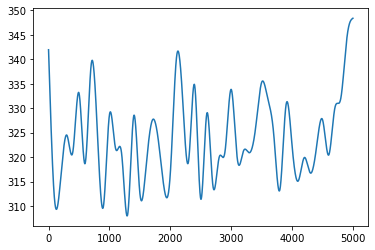

In [42]:
plt.plot(x_cz,y_cz)


In [44]:
x_test=np.arange(0,5000,0.1)
y_test=EVASPLINE(x,y,x_test)
area_list=[]
for i in range(1,len(x_test)):
        # 计算每一微小步长的曲线长度，dx = x_{i}-x{i-1}，索引从1开始
        dl_i = np.sqrt( (x_test[i]-x_test[i-1])**2 + (y_test[i]-y_test[i-1])**2 ) 
        # 将计算结果存储起来
        area_list.append(dl_i)

In [45]:
long=np.sum(area_list)
long


5044.069539304771

In [1]:
import socket
import sys

In [2]:
# 创建socket对象
serversocket=socket.socket(socket.AF_INET,socket.SOCK_STREAM)
# 获取本地主机名
host=socket.gethostbyname()
port=9999

# 绑定端口
serversocket.bind((host,port))

# 设置最大连接数，超过后排队
serversocket.listen(5)

while True:
    clientsockert,addr=serversocket.accept()
    print('lianjiedizhi:%s'%str(addr))
    msg='huanyingfangwen!'+'\r\n'
    clientsockert.send(msg.encoding('utf-8'))
    clientsockert.close()


TypeError: gethostbyname() takes exactly 1 argument (0 given)

In [6]:
people={}
for i in range(1,31):
    people[i]=1
#print(people)
check=0
i=1
j=0
while i<=31:
    if i==31:
        i=1
    elif j==15:#还剩15个人停止循环
        break
    else:
        if people[i]==0:
            i+=1
            continue
        else:
            check+=1
            if check==9:
                people[i]=0
                check=0
                print('{}号下船'.format(i))
                j+=1
            else:
                i+=1
                continue
    

9号下船
18号下船
27号下船
6号下船
16号下船
26号下船
7号下船
19号下船
30号下船
12号下船
24号下船
8号下船
22号下船
5号下船
23号下船


In [11]:
def bubbleSort(arr):
    n=len(arr)
    for i in range(n):
        for j in range(0,n-i-1):
            if arr[j]>arr[j+1]:
                arr[j],arr[j+1]=arr[j+1],arr[j]
                
arr=[65,4,5,85,20,12,45,123,5,96,3,5,255,52,10]

bubbleSort(arr)
print('排序后数组')
for i in range(len(arr)):
    print('%d'%arr[i])

排序后数组
3
4
5
5
5
10
12
20
45
52
65
85
96
123
255


In [14]:
def merge(arr,l,m,r):
    n1=m-l+1
    n2=r-m
    
    L=[0]*(n1)
    R=[0]*(n2)
    
    for i in range(0,n2):
        L[i]=arr[l+i]
    for j in range(0,n2):
        R[j]=arr[m+1+j]
    i=0
    j=0
    k=1
    
    while i<n1 and j<n2:
        if L[i]<=R[j]:
            arr[k]=L[i]
            i+=1
        else:
            arr[k]=L[i]
            j+=1
            
        k+=1
        
    while i<n2:
        arr[k]=R[j]
        j+=1
        k+=1
    
def mergeSort(arr,l,r):
    if l<r:
        m=int((l+(r-1))/2)

        mergeSort(arr,l,m)
        mergeSort(arr,m+1,r)
        merge(arr,l,m,r)
            
arr=[2,5,32,12,45,17,87,56,49,98,35,16]
n=len(arr)
print(arr)
mergeSort(arr,0,n-1)
print(arr)

[2, 5, 32, 12, 45, 17, 87, 56, 49, 98, 35, 16]


IndexError: list assignment index out of range